<a href="https://colab.research.google.com/github/soham2710/Bankchurn/blob/main/Customer_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyforest

In [ ]:
import pyforest
print(active_imports())

import pydot
import pickle
from scipy import stats
import statsmodels.api as sm
import sys
from sklearn import svm
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import statistics
import sklearn
import seaborn as sns
from scipy import signal as sg
import pandas as pd
import spacy
import skimage
['import pydot', 'import pickle', 'from scipy import stats', 'import statsmodels.api as sm', 'import sys', 'from sklearn import svm', 'import plotly as py', 'import plotly.express as px', 'import matplotlib.pyplot as plt', 'import statistics', 'import sklearn', 'import seaborn as sns', 'from scipy import signal as sg', 'import pandas as pd', 'import spacy', 'import skimage']


In [ ]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [ ]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

For each categorical variable in cat, a separate count plot is created, displaying the distribution of categories within that variable.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

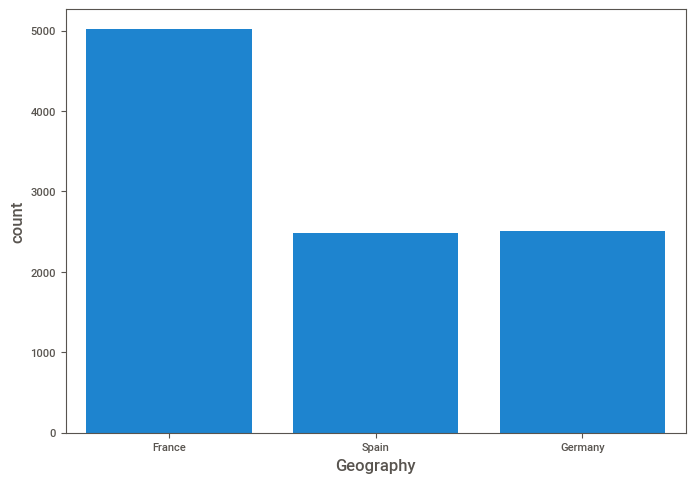

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

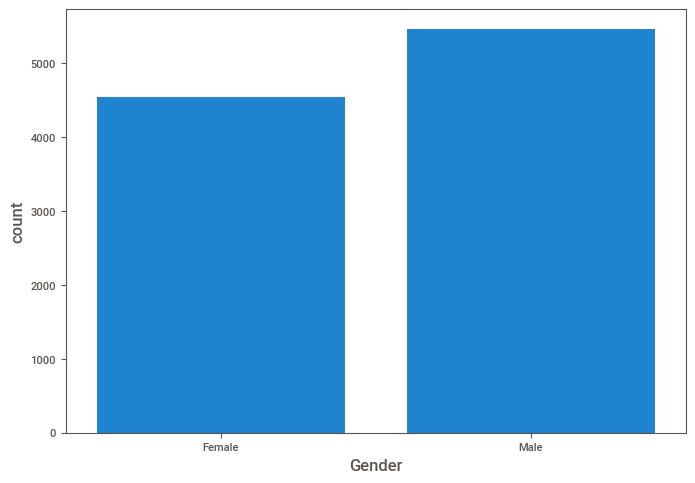

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

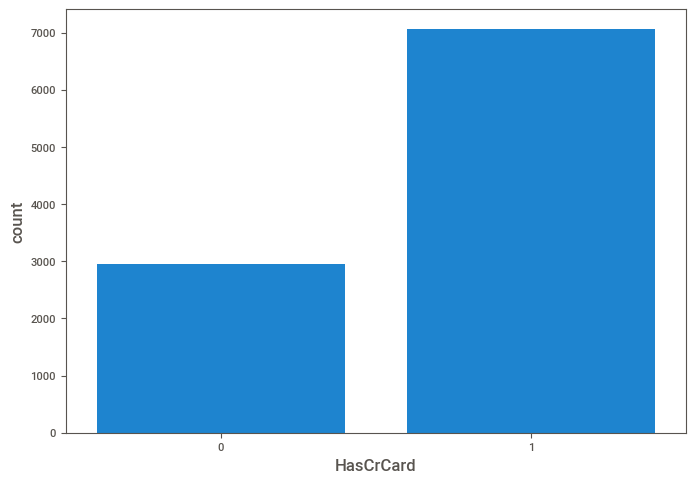

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

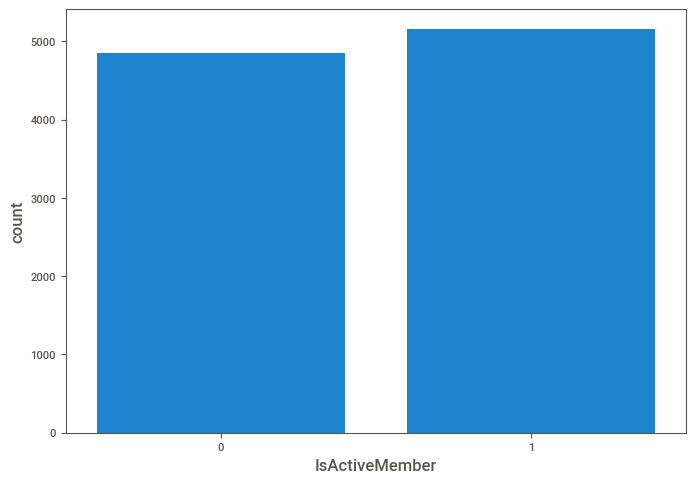

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

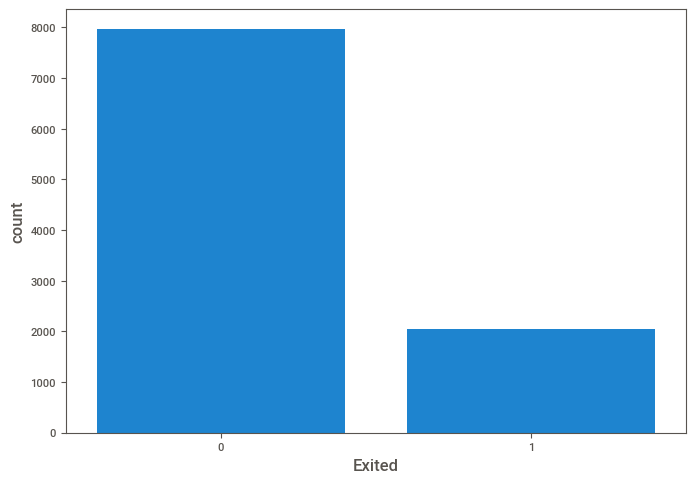

In [ ]:
cat=["Geography","Gender","HasCrCard","IsActiveMember","Exited"]
con=['CreditScore',"Tenure","Balance",'NumOfProducts',"EstimatedSalary","Age"]
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

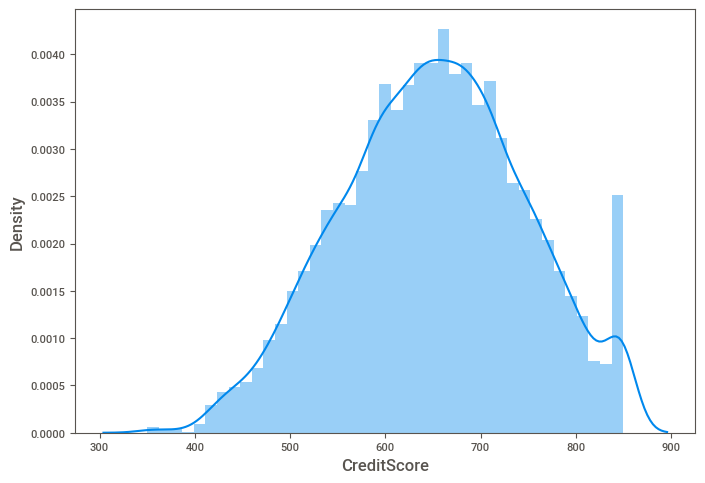

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

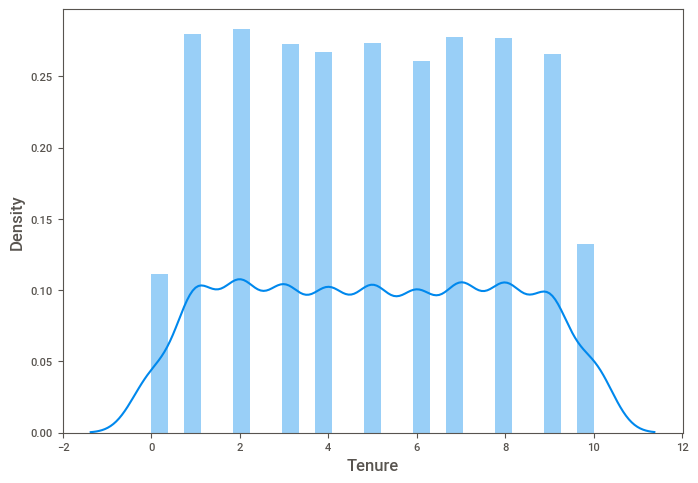

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

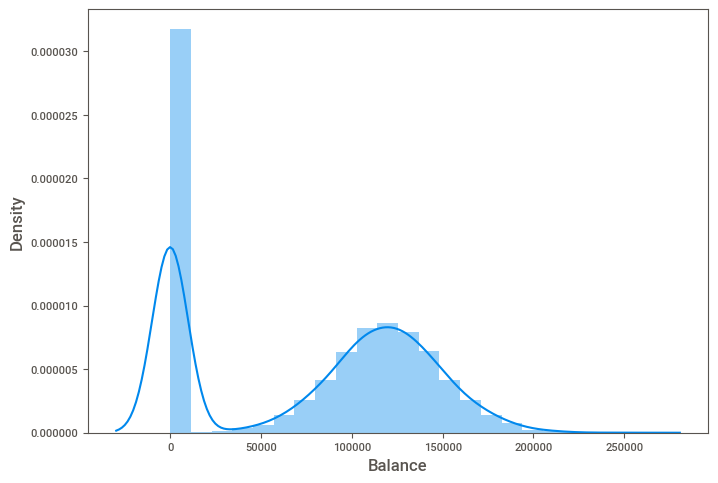

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

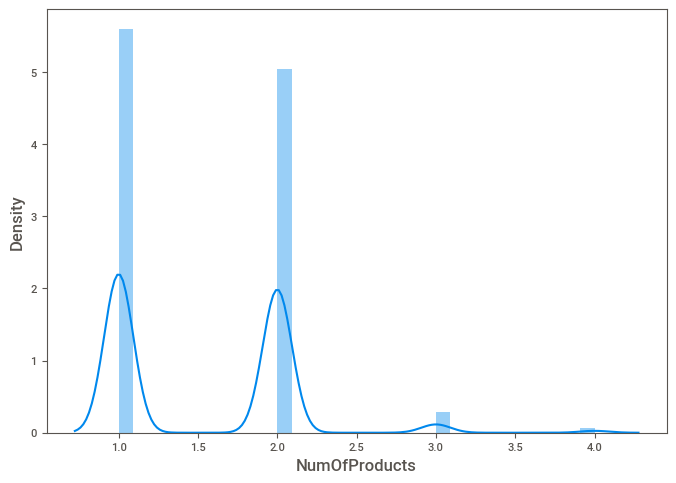

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

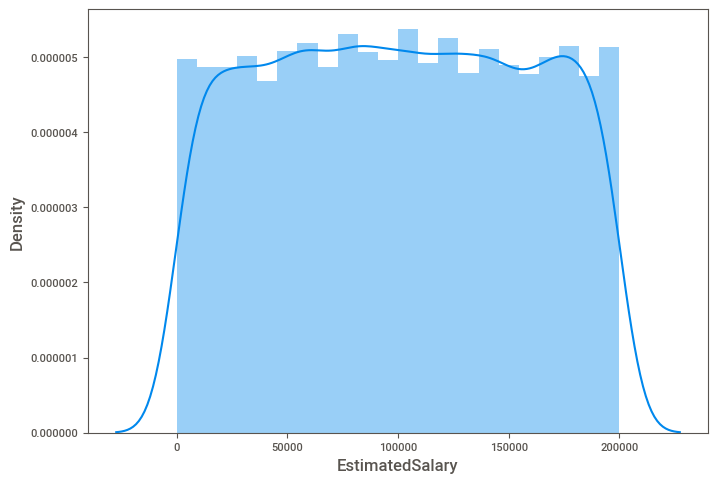

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

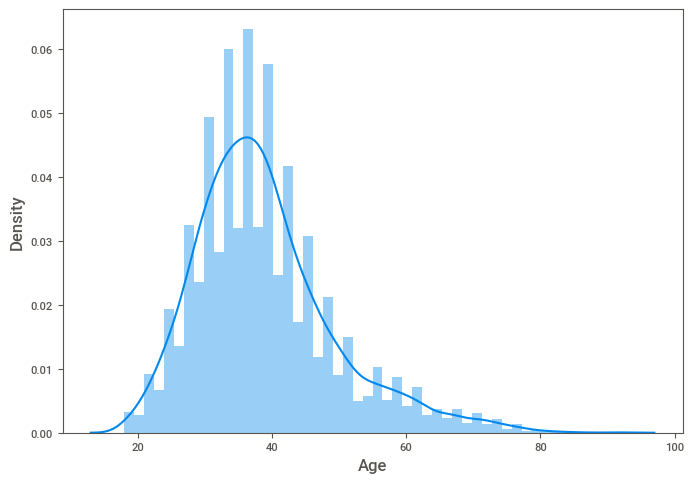

In [ ]:
for i in con:
    sns.distplot(df[i])
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

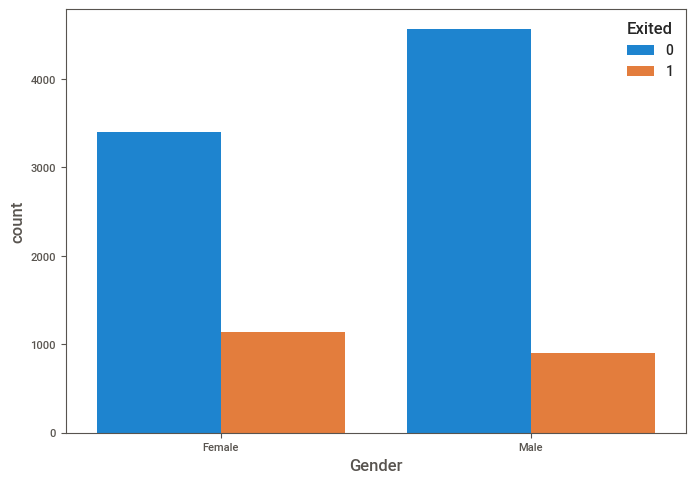

In [ ]:
sns.countplot(x="Gender",hue="Exited",data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

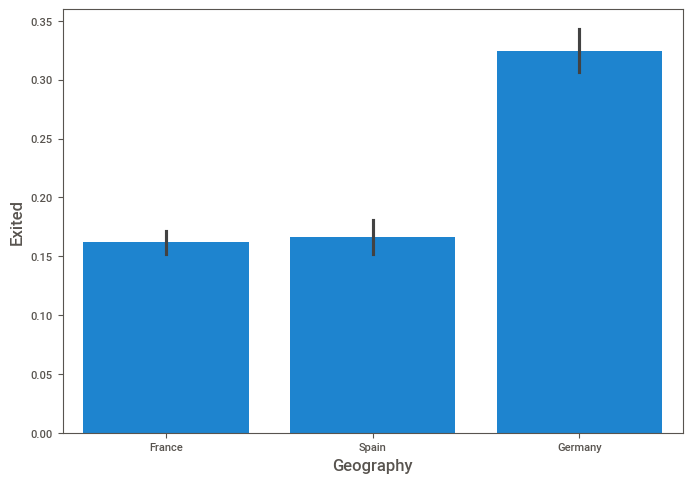

In [ ]:
sns.barplot(x="Geography",y="Exited",data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

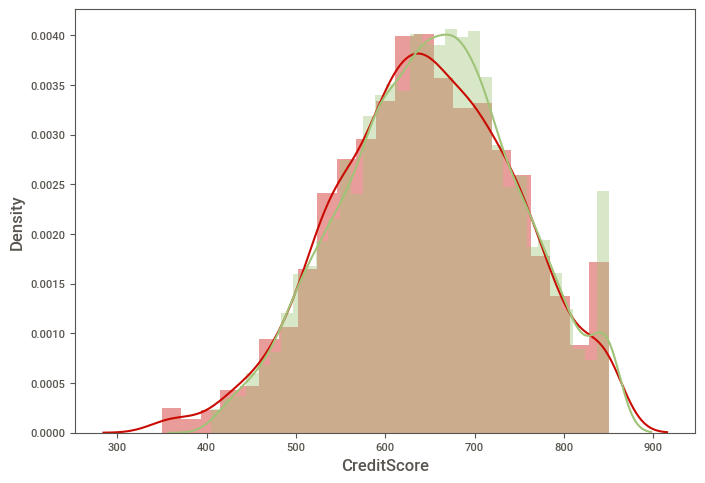

In [ ]:
sns.distplot(df["CreditScore"][df["Exited"]==1],color='r')
sns.distplot(df["CreditScore"][df["Exited"]==0],color='g')
plt.show()

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

# Perform the analysis
report = sv.analyze(df)

# Generate and save the report
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

# Initialize PyCaret setup
clf_setup = setup(data=df, target='Exited', session_id=123)

# Compare models and select best
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 15)"
4,Transformed data shape,"(10000, 20)"
5,Transformed train set shape,"(7000, 20)"
6,Transformed test set shape,"(3000, 20)"
7,Numeric features,11
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.1470
rf,Random Forest Classifier,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.6070
ada,Ada Boost Classifier,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.4620
lda,Linear Discriminant Analysis,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.1560
xgboost,Extreme Gradient Boosting,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.2350
lightgbm,Light Gradient Boosting Machine,0.9986,0.0000,0.9986,0.9944,0.9965,0.9956,0.9956,0.5270
et,Extra Trees Classifier,0.9984,0.0000,0.9979,0.9944,0.9962,0.9952,0.9952,0.7190
lr,Logistic Regression,0.9983,0.0000,0.9972,0.9944,0.9958,0.9947,0.9947,2.1400
gbc,Gradient Boosting Classifier,0.9983,0.0000,0.9979,0.9938,0.9958,0.9947,0.9947,1.2920
dt,Decision Tree Classifier,0.9974,0.0000,0.9930,0.9944,0.9937,0.9921,0.9921,0.2010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Create the best model
final_model = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9971,0.0000,1.0000,0.9861,0.9930,0.9912,0.9913
2,0.9986,0.0000,1.0000,0.9930,0.9965,0.9956,0.9956
3,0.9986,0.0000,1.0000,0.9931,0.9965,0.9956,0.9956
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9986,0.0000,1.0000,0.9931,0.9965,0.9956,0.9956
6,0.9971,0.0000,0.9860,1.0000,0.9930,0.9912,0.9912
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9986,0.0000,1.0000,0.9931,0.9965,0.9956,0.9956


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Evaluate model
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Predict on holdout set
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9987,0.9979,0.9967,0.9967,0.9967,0.9959,0.9959


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited,prediction_label
3564,847,France,Male,51,5,97565.742188,1,0,0,144184.062500,1,3,PLATINUM,530,1,1
1986,845,Germany,Female,41,2,81733.742188,2,0,0,199761.296875,0,1,DIAMOND,359,0,0
3684,482,France,Female,35,2,133111.734375,1,0,1,79957.953125,0,3,PLATINUM,956,0,0
3334,671,France,Male,27,5,0.000000,2,0,0,120893.070312,0,4,GOLD,962,0,0
8346,695,Spain,Male,32,9,0.000000,3,0,1,38533.789062,0,4,GOLD,475,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,608,France,Female,47,6,0.000000,1,1,1,126012.570312,0,5,SILVER,725,0,0
364,640,France,Male,68,9,0.000000,2,1,1,199493.375000,0,4,PLATINUM,763,0,0
3872,605,France,Male,39,6,111169.906250,1,0,0,9641.400391,0,5,SILVER,642,0,0
3311,513,Spain,Male,72,3,98903.062500,1,1,1,81251.242188,0,5,DIAMOND,842,0,0


In [ ]:
# Finalize the model
finalized_model = finalize_model(final_model)

# Save the model
save_model(finalized_model, 'bank_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary', 'Complain',
                                              'Satisfaction Score',
                                              'Point Earned'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                                                               return_df=True,
                          

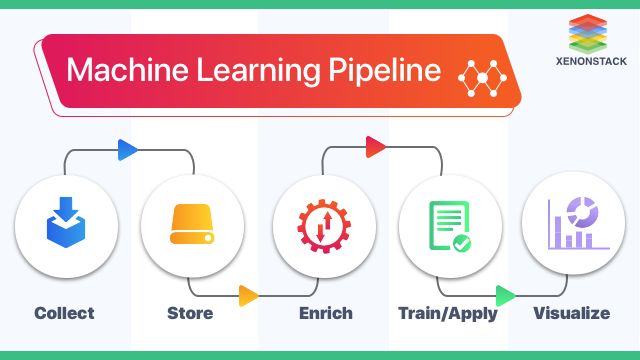